## <font color="red"> ESERCIZIO 04
    
*Nota*: in questo esercizio l'eseguibile è chiamato `MolDyn_NVE.exe` e necessita ogni volta di un file di input `input.dat`; quelli predefiniti per le tre fasi finiscono rispettivamente in `.solid`, `.liquid`, `.gas` e sono già personalizzati per ottenere i prossimi risultati. Per ogni esecuzione è però possibile solo sceglierne uno alla volta e i risultati prodotti vengono salvati nella cartella corrente e non in quelle dei risultati. *Attenzione*: ogni volta che viene lanciata la compilazione, viene lanciato anche lo script `clean.sh` che cancella i risultati precedenti.

Nel resto del notebook sono sottintese le unità naturali: quando introduco quelle "normali" lo sottolineo.

### <font color="blue"> Parte 01
    
Per questa prima parte ho modificato il codice in modo da poter scegliere se leggere solo le posizioni iniziali attuali o anche quelle vecchie (file `old.0`): la scelta viene effettuata aggiungendo la parola *actual* oppure *old* nell'opportuna riga del file di input. In particolare:
- vengono per prima cosa caricate le posizioni iniziali $\vec{r}(t)$ dal file `config.0`.
- Caso *old*: vengono caricate le posizioni $\vec{r}(t-dt)$ dal file `old.0`.
- Caso *actual*: vengono generate delle velocità random con cui vengono create le posizioni vecchie (non cambia nulla dal codice originale fornito).

Per quanto riguarda invece il secondo punto, ho aggiunto la funzione *Eq_Temp* che permette di equilibrare il sistema a una temperatura $T^\star$ da indicare nel file di input. Il funzionamento è il seguente:
1. Fisso $\Delta T=10^{-4}$: il sistema sarà in equiblibrio quando due temperature consecutive disteranno meno di $\Delta T$.
2. Effettuo 10 passi con l'algoritmo di Verlet (tramite la funzione *Move*) per valutare le nuove posizioni $\vec{r}(t+dt)$. Scelgo 10 passi per avere una minima variazione dei parametri.
3. Viene calcolata la velocità dopo questi passi in modo da ricavare la temperatura:

$$ \vec{v}(t)\simeq\frac{\vec{r}(t+dt)-\vec{r}(t-dt)}{2dt} \\
\Longrightarrow T=\frac{1}{3N_{part}}\sum_{i=1}^{N_{part}}\vert \vec{v}_i(t)-\langle\vec{v}(t)\rangle\vert^2. $$
Ho modificato l'originale funzione *Move* in modo da salvare le posizioni a $t-dt$.
4. Il tutto si ripete fino a raggiungere la temperatura desiderata $T^\star$; la simulazione dunque può cominciare con questa temperatura, con le ultime velocità e con le ultime posizioni.

Ho aggiunto una condizione per evitare un loop infinito: infatti non sempre si riesce a raggiungere $T^\star$ partendo da una qualsiasi temperatura.

### <font color="blue"> Parte 02
    
Per calcolare i valori medi ho aggiunto una funzione *Measure_ave* che viene eseguita alla fine del codice: utilizza la solita funzione del *blocking method* con input tutti i dati istantanei prodotti. Per questo ho modificato la funzione originale *Measure* in modo da aver salvati su un vettore tutti i dati istantanei.

### <font color="blue"> Parte 03
    
Infine ho aggiunto il calcolo della pressione istantanea tramite l'utilizzo del viriale; poi i valori medi e le incertezze vengono calcolate come nel punto precedente.

### <font color="blue"> Parte 04
    
Tutte le simulazioni sono state effettuate utilizzando i parametri forniti nel testo, utilizzando $10^4$ steps con $dt=5\cdot10^{-4}$; sottolineo che le misure istantanee sono prese ogni 10 steps, quindi si avranno 1000 misure delle grandezze.

Per prima cosa riporto dei grafici in cui si osserva la temperatura del sistema in fase di equilibratura al variare del numero di steps effettuati:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import constants

-- SOLID PHASE --
Simulation initial temperature = 0.800091

-- LIQUID PHASE --
Simulation initial temperature = 1.09996

-- GAS PHASE --
Simulation initial temperature = 1.19998



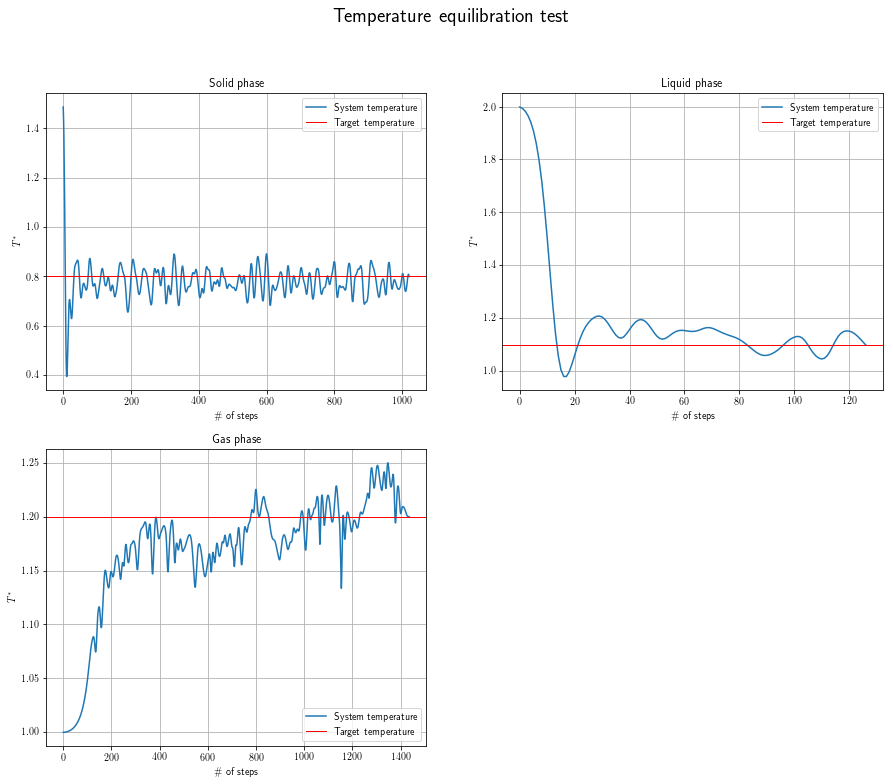

In [2]:
plt.rc('text', usetex=True)

plt.figure(figsize=(15,12))
plt.suptitle('Temperature equilibration test',fontsize=20)

plt.subplot(221)
plt.title('Solid phase')
n, t = np.loadtxt("Solid_phase/Eq.temp", usecols=(0,1), delimiter='    ', unpack='true')
print('-- SOLID PHASE --')
print('Simulation initial temperature =', t[-1])
print()
plt.plot(n, t, label='System temperature')
plt.axhline(y=0.8, color='red', linewidth=1, label='Target temperature')

plt.xlabel('$\#$ of steps')
plt.ylabel('$T^*$')
plt.legend()
plt.grid(True)

plt.subplot(222)
plt.title('Liquid phase')
n, t = np.loadtxt("Liquid_phase/Eq.temp", usecols=(0,1), delimiter='    ', unpack='true')
print('-- LIQUID PHASE --')
print('Simulation initial temperature =', t[-1])
print()
plt.plot(n, t, label='System temperature')
plt.axhline(y=1.1, color='red', linewidth=1, label='Target temperature')

plt.xlabel('$\#$ of steps')
plt.ylabel('$T^*$')
plt.legend()
plt.grid(True)

plt.subplot(223)
plt.title('Gas phase')
n, t = np.loadtxt("Gas_phase/Eq.temp", usecols=(0,1), delimiter='    ', unpack='true')
print('-- GAS PHASE --')
print('Simulation initial temperature =', t[-1])
print()
plt.plot(n, t, label='System temperature')
plt.axhline(y=1.2, color='red', linewidth=1, label='Target temperature')

plt.xlabel('$\#$ of steps')
plt.ylabel('$T^*$')
plt.legend(loc=4)
plt.grid(True)

plt.show()

Riporto ora i risultati per le varie combinazioni di dati proposti utilizzando come unità di misura quelle del SI:

In [3]:
kb = constants.value('Boltzmann constant') #J/K
amu = constants.value('atomic mass constant') #kg-1

sig = 0.34*(10**-9) #m
e = 120. * kb #J
ek = 120. #e/kb
m = 39.948 * amu #kg
t = sig * np.sqrt(m/e)
pr = e/(sig**3)

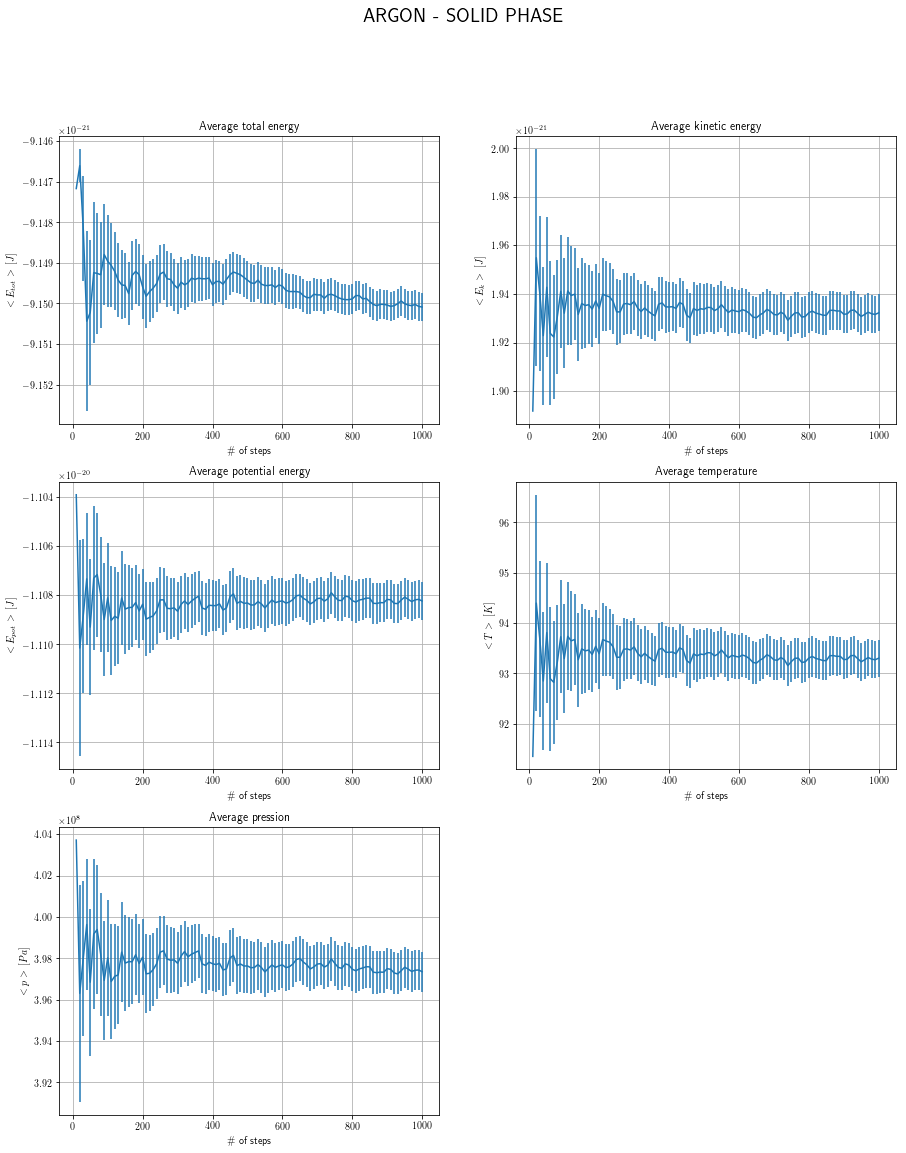

In [4]:
plt.figure(figsize=(15,18))

plt.suptitle('ARGON - SOLID PHASE',fontsize=20)

plt.subplot(321)
plt.title('Average total energy')
bl, E, errE = np.loadtxt("Solid_phase/etot.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,E * e,yerr=errE * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_{tot}> \, [J]$')
plt.grid(True)

plt.subplot(322)
plt.title('Average kinetic energy')
bl, Ek, errEk = np.loadtxt("Solid_phase/ekin.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,Ek * e,yerr=errEk * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_k> \, [J]$')
plt.grid(True)

plt.subplot(323)
plt.title('Average potential energy')
bl, U, errU = np.loadtxt("Solid_phase/epot.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,U * e,yerr=errU * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_{pot}> \, [J]$')
plt.grid(True)

plt.subplot(324)
plt.title('Average temperature')
bl, T, errT = np.loadtxt("Solid_phase/temp.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,T * ek,yerr=errT * ek)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<T> \, [K]$')
plt.grid(True)

plt.subplot(325)
plt.title('Average pression')
bl, p, errp = np.loadtxt("Solid_phase/pres.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,p * pr,yerr=errp * pr)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<p> \, [Pa]$')
plt.grid(True)

plt.show()

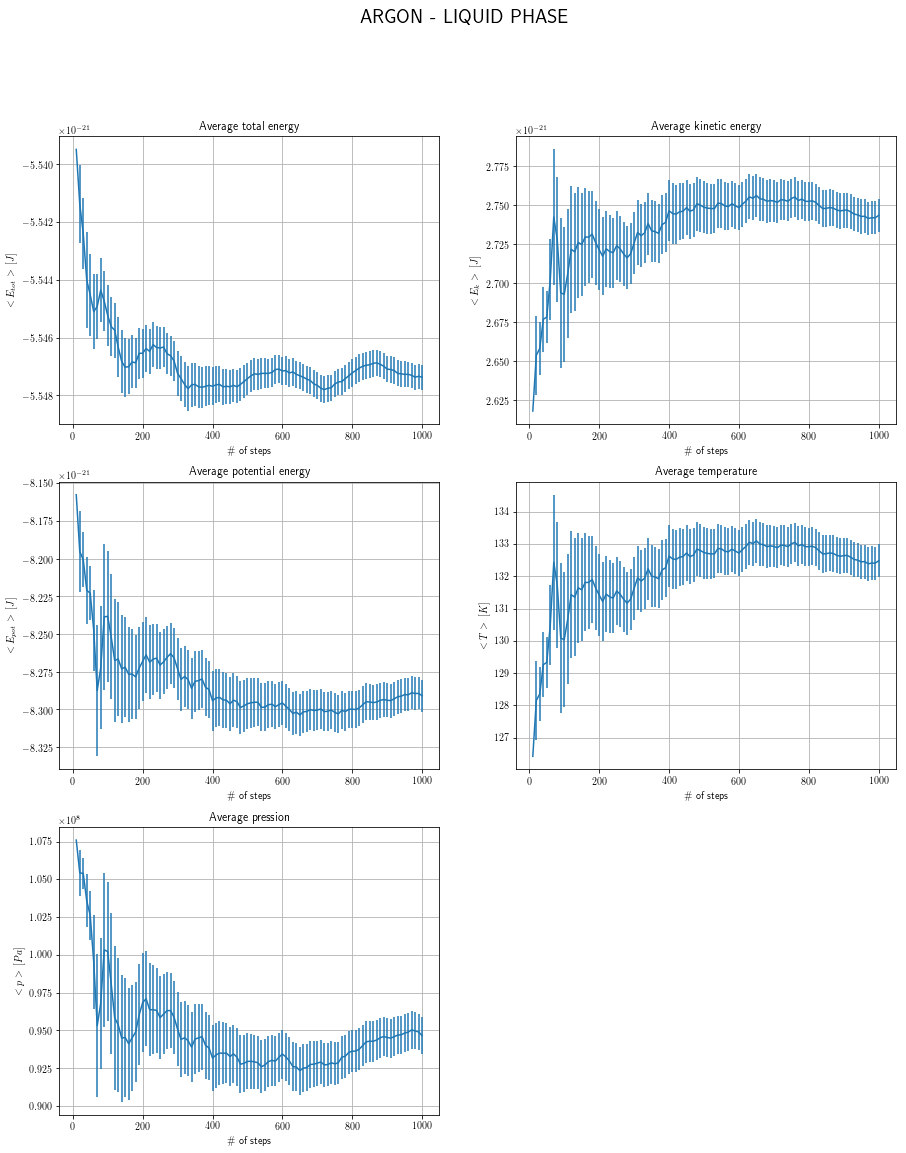

In [5]:
plt.figure(figsize=(15,18))

plt.suptitle('ARGON - LIQUID PHASE',fontsize=20)

plt.subplot(321)
plt.title('Average total energy')
bl, E, errE = np.loadtxt("Liquid_phase/etot.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,E * e,yerr=errE * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_{tot}> \, [J]$')
plt.grid(True)

plt.subplot(322)
plt.title('Average kinetic energy')
bl, Ek, errEk = np.loadtxt("Liquid_phase/ekin.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,Ek * e,yerr=errEk * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_k> \, [J]$')
plt.grid(True)

plt.subplot(323)
plt.title('Average potential energy')
bl, U, errU = np.loadtxt("Liquid_phase/epot.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,U * e,yerr=errU * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_{pot}> \, [J]$')
plt.grid(True)

plt.subplot(324)
plt.title('Average temperature')
bl, T, errT = np.loadtxt("Liquid_phase/temp.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,T * ek,yerr=errT * ek)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<T> \, [K]$')
plt.grid(True)

plt.subplot(325)
plt.title('Average pression')
bl, p, errp = np.loadtxt("Liquid_phase/pres.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,p * pr,yerr=errp * pr)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<p> \, [Pa]$')
plt.grid(True)

plt.show()

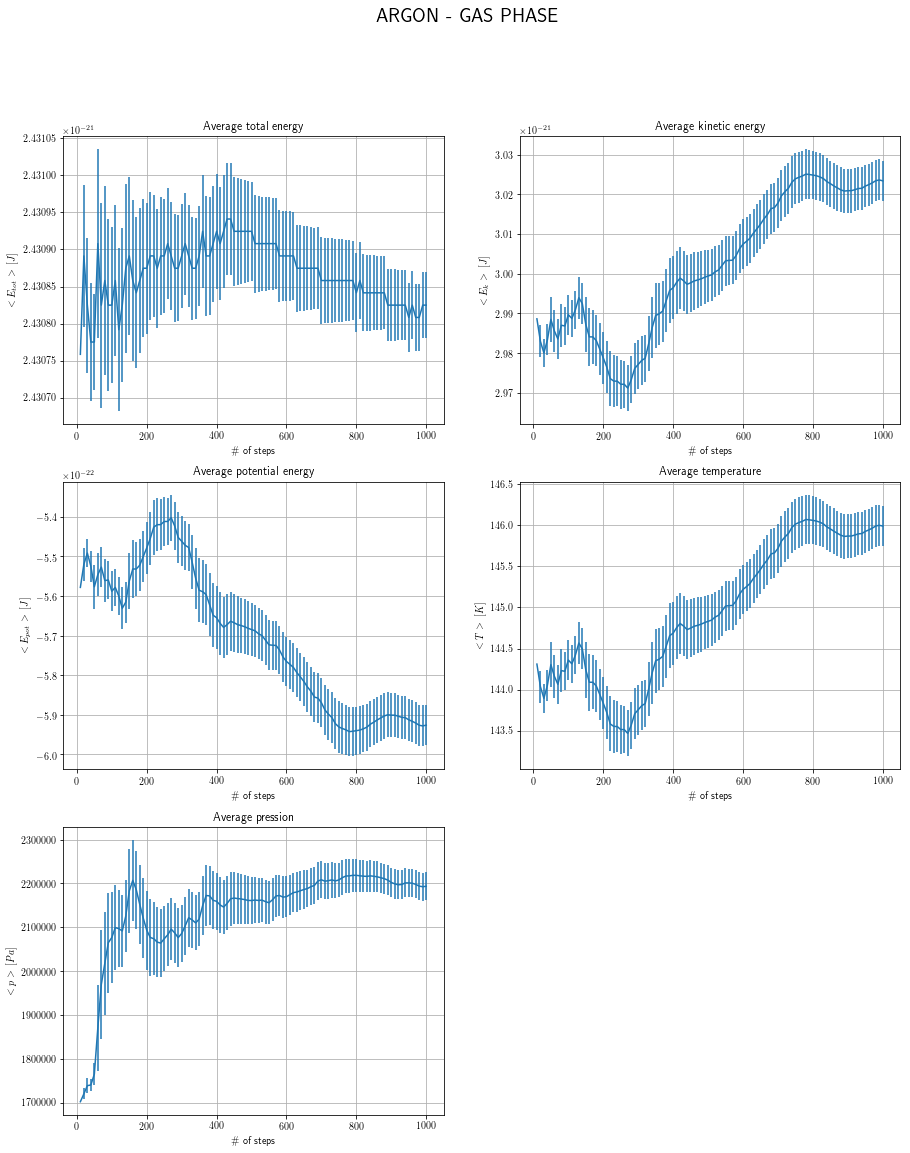

In [6]:
plt.figure(figsize=(15,18))

plt.suptitle('ARGON - GAS PHASE',fontsize=20)

plt.subplot(321)
plt.title('Average total energy')
bl, E, errE = np.loadtxt("Gas_phase/etot.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,E * e,yerr=errE * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_{tot}> \, [J]$')
plt.grid(True)

plt.subplot(322)
plt.title('Average kinetic energy')
bl, Ek, errEk = np.loadtxt("Gas_phase/ekin.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,Ek * e,yerr=errEk * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_k> \, [J]$')
plt.grid(True)

plt.subplot(323)
plt.title('Average potential energy')
bl, U, errU = np.loadtxt("Gas_phase/epot.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,U * e,yerr=errU * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_{pot}> \, [J]$')
plt.grid(True)

plt.subplot(324)
plt.title('Average temperature')
bl, T, errT = np.loadtxt("Gas_phase/temp.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,T * ek,yerr=errT * ek)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<T> \, [K]$')
plt.grid(True)

plt.subplot(325)
plt.title('Average pression')
bl, p, errp = np.loadtxt("Gas_phase/pres.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,p * pr,yerr=errp * pr)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<p> \, [Pa]$')
plt.grid(True)

plt.show()

In [7]:
sig = 0.364*(10**-9) #m
e = 164. * kb #J
ek = 164. #e/kb
m = 83.798 * amu #kg
t = sig * np.sqrt(m/e)
pr = e/(sig**3)

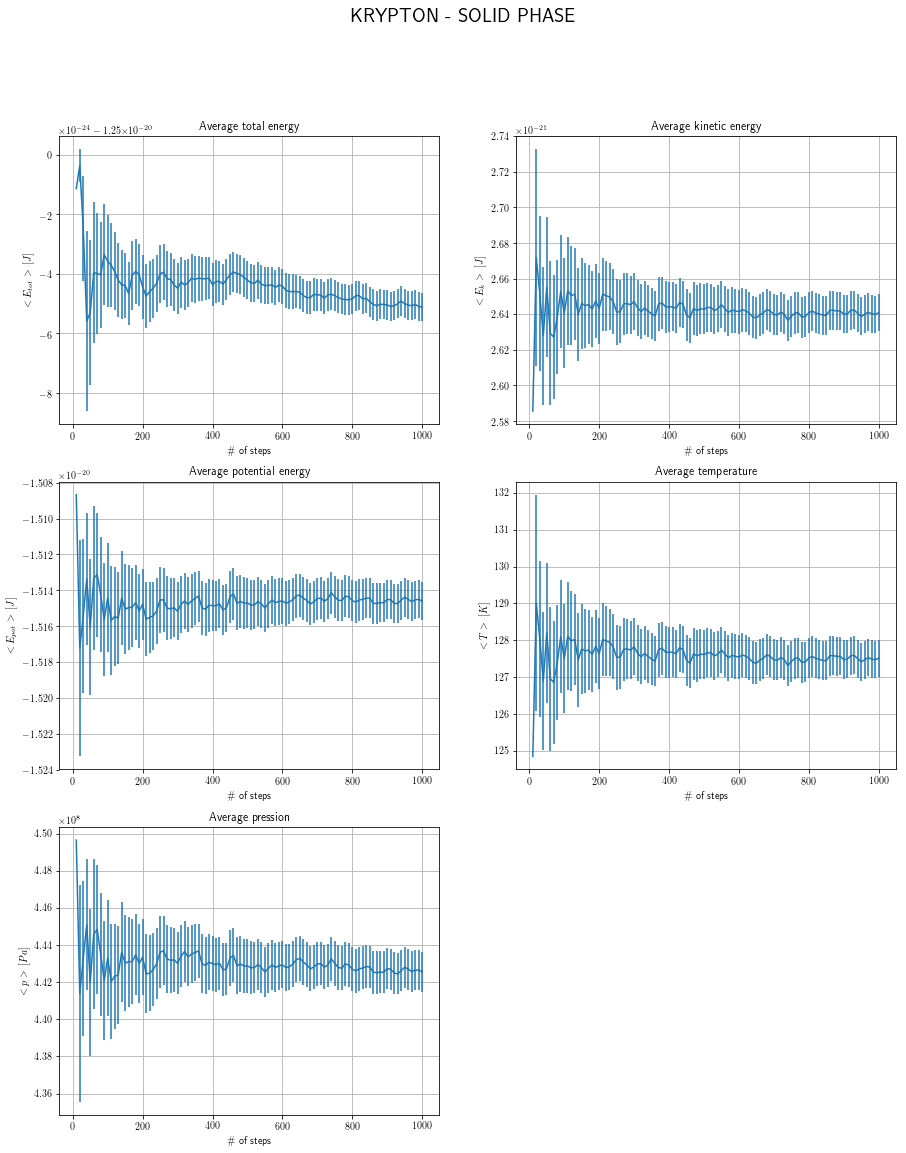

In [8]:
plt.figure(figsize=(15,18))

plt.suptitle('KRYPTON - SOLID PHASE',fontsize=20)

plt.subplot(321)
plt.title('Average total energy')
bl, E, errE = np.loadtxt("Solid_phase/etot.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,E * e,yerr=errE * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_{tot}> \, [J]$')
plt.grid(True)

plt.subplot(322)
plt.title('Average kinetic energy')
bl, Ek, errEk = np.loadtxt("Solid_phase/ekin.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,Ek * e,yerr=errEk * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_k> \, [J]$')
plt.grid(True)

plt.subplot(323)
plt.title('Average potential energy')
bl, U, errU = np.loadtxt("Solid_phase/epot.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,U * e,yerr=errU * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_{pot}> \, [J]$')
plt.grid(True)

plt.subplot(324)
plt.title('Average temperature')
bl, T, errT = np.loadtxt("Solid_phase/temp.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,T * ek,yerr=errT * ek)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<T> \, [K]$')
plt.grid(True)

plt.subplot(325)
plt.title('Average pression')
bl, p, errp = np.loadtxt("Solid_phase/pres.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,p * pr,yerr=errp * pr)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<p> \, [Pa]$')
plt.grid(True)

plt.show()

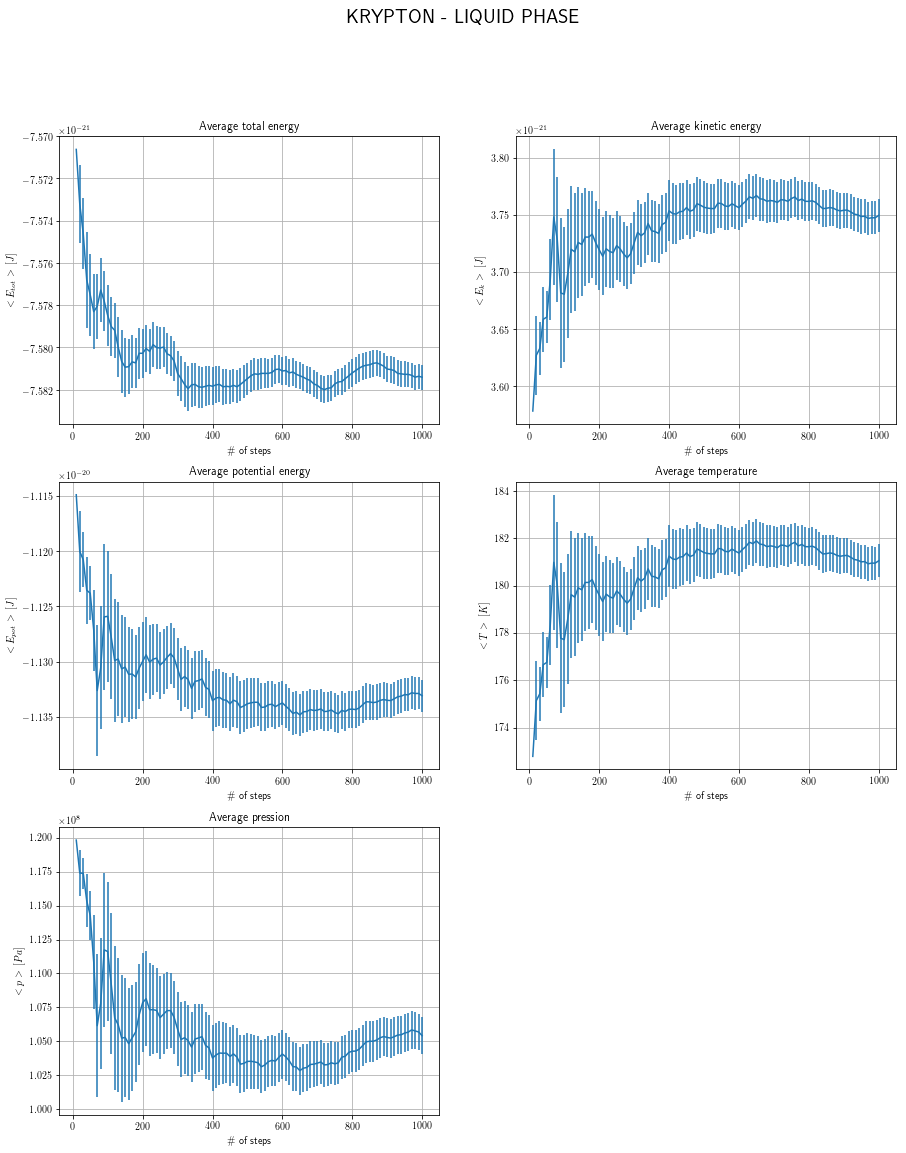

In [9]:
plt.figure(figsize=(15,18))

plt.suptitle('KRYPTON - LIQUID PHASE',fontsize=20)

plt.subplot(321)
plt.title('Average total energy')
bl, E, errE = np.loadtxt("Liquid_phase/etot.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,E * e,yerr=errE * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_{tot}> \, [J]$')
plt.grid(True)

plt.subplot(322)
plt.title('Average kinetic energy')
bl, Ek, errEk = np.loadtxt("Liquid_phase/ekin.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,Ek * e,yerr=errEk * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_k> \, [J]$')
plt.grid(True)

plt.subplot(323)
plt.title('Average potential energy')
bl, U, errU = np.loadtxt("Liquid_phase/epot.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,U * e,yerr=errU * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_{pot}> \, [J]$')
plt.grid(True)

plt.subplot(324)
plt.title('Average temperature')
bl, T, errT = np.loadtxt("Liquid_phase/temp.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,T * ek,yerr=errT * ek)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<T> \, [K]$')
plt.grid(True)

plt.subplot(325)
plt.title('Average pression')
bl, p, errp = np.loadtxt("Liquid_phase/pres.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,p * pr,yerr=errp * pr)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<p> \, [Pa]$')
plt.grid(True)

plt.show()

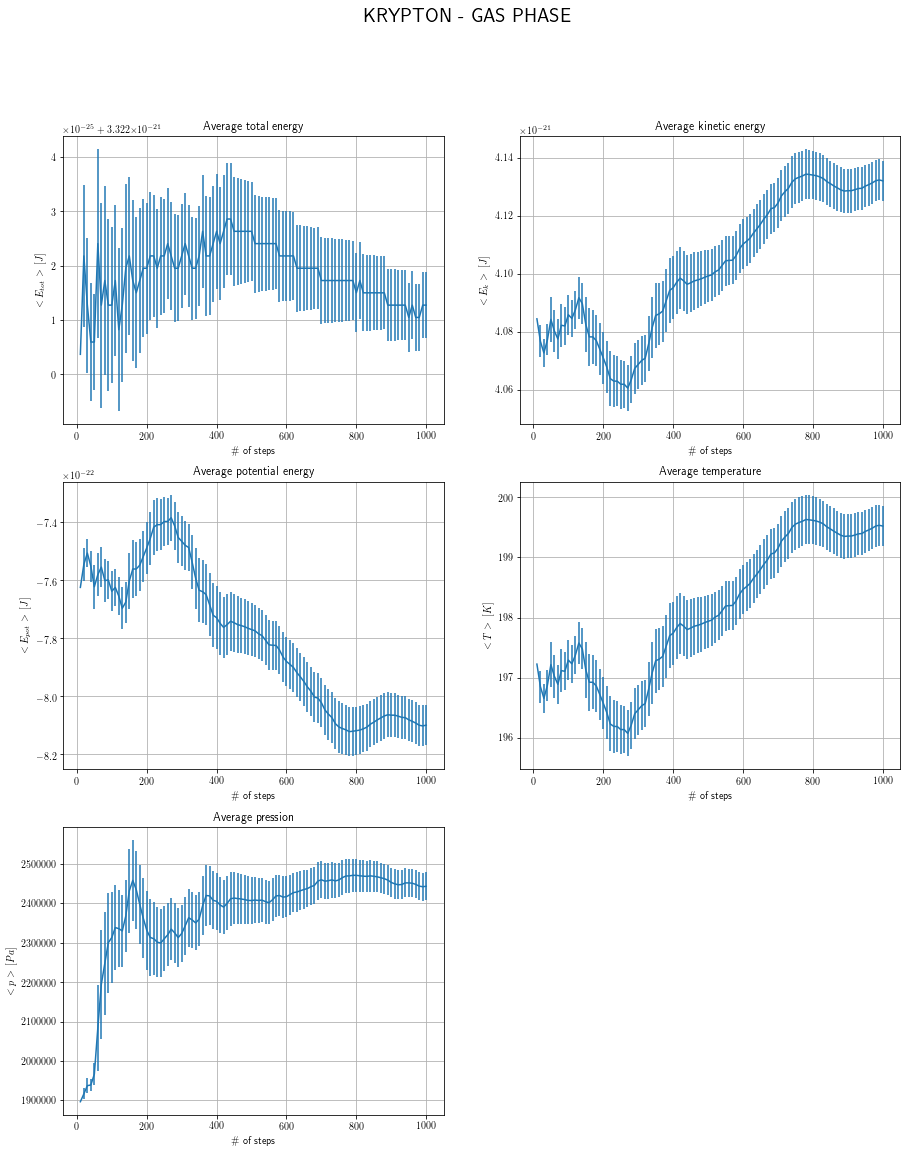

In [10]:
plt.figure(figsize=(15,18))

plt.suptitle('KRYPTON - GAS PHASE',fontsize=20)

plt.subplot(321)
plt.title('Average total energy')
bl, E, errE = np.loadtxt("Gas_phase/etot.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,E * e,yerr=errE * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_{tot}> \, [J]$')
plt.grid(True)

plt.subplot(322)
plt.title('Average kinetic energy')
bl, Ek, errEk = np.loadtxt("Gas_phase/ekin.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,Ek * e,yerr=errEk * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_k> \, [J]$')
plt.grid(True)

plt.subplot(323)
plt.title('Average potential energy')
bl, U, errU = np.loadtxt("Gas_phase/epot.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,U * e,yerr=errU * e)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<E_{pot}> \, [J]$')
plt.grid(True)

plt.subplot(324)
plt.title('Average temperature')
bl, T, errT = np.loadtxt("Gas_phase/temp.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,T * ek,yerr=errT * ek)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<T> \, [K]$')
plt.grid(True)

plt.subplot(325)
plt.title('Average pression')
bl, p, errp = np.loadtxt("Gas_phase/pres.ave", usecols=(0,1,2), delimiter='    ', unpack='true')
plt.errorbar(bl,p * pr,yerr=errp * pr)
plt.xlabel('$\#$ of steps')
plt.ylabel('$<p> \, [Pa]$')
plt.grid(True)

plt.show()

Dai grafici si può notare come i valori ottenuti siano più "regolari" nel caso della fase liquida e solida rispetto al gas, dove seppur entro brevi, ranges le oscillazioni sono notevoli anche dopo un numero abbastanza elevato di steps; probabilmente una migliore equilibratura è necessaria in questo caso.